# Wine quality dataset analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('WineQT.csv', index_col=-1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.duplicated().sum()

125

In [6]:
df.drop_duplicates(keep='first', inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1018 non-null   float64
 1   volatile acidity      1018 non-null   float64
 2   citric acid           1018 non-null   float64
 3   residual sugar        1018 non-null   float64
 4   chlorides             1018 non-null   float64
 5   free sulfur dioxide   1018 non-null   float64
 6   total sulfur dioxide  1018 non-null   float64
 7   density               1018 non-null   float64
 8   pH                    1018 non-null   float64
 9   sulphates             1018 non-null   float64
 10  alcohol               1018 non-null   float64
 11  quality               1018 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 103.4 KB


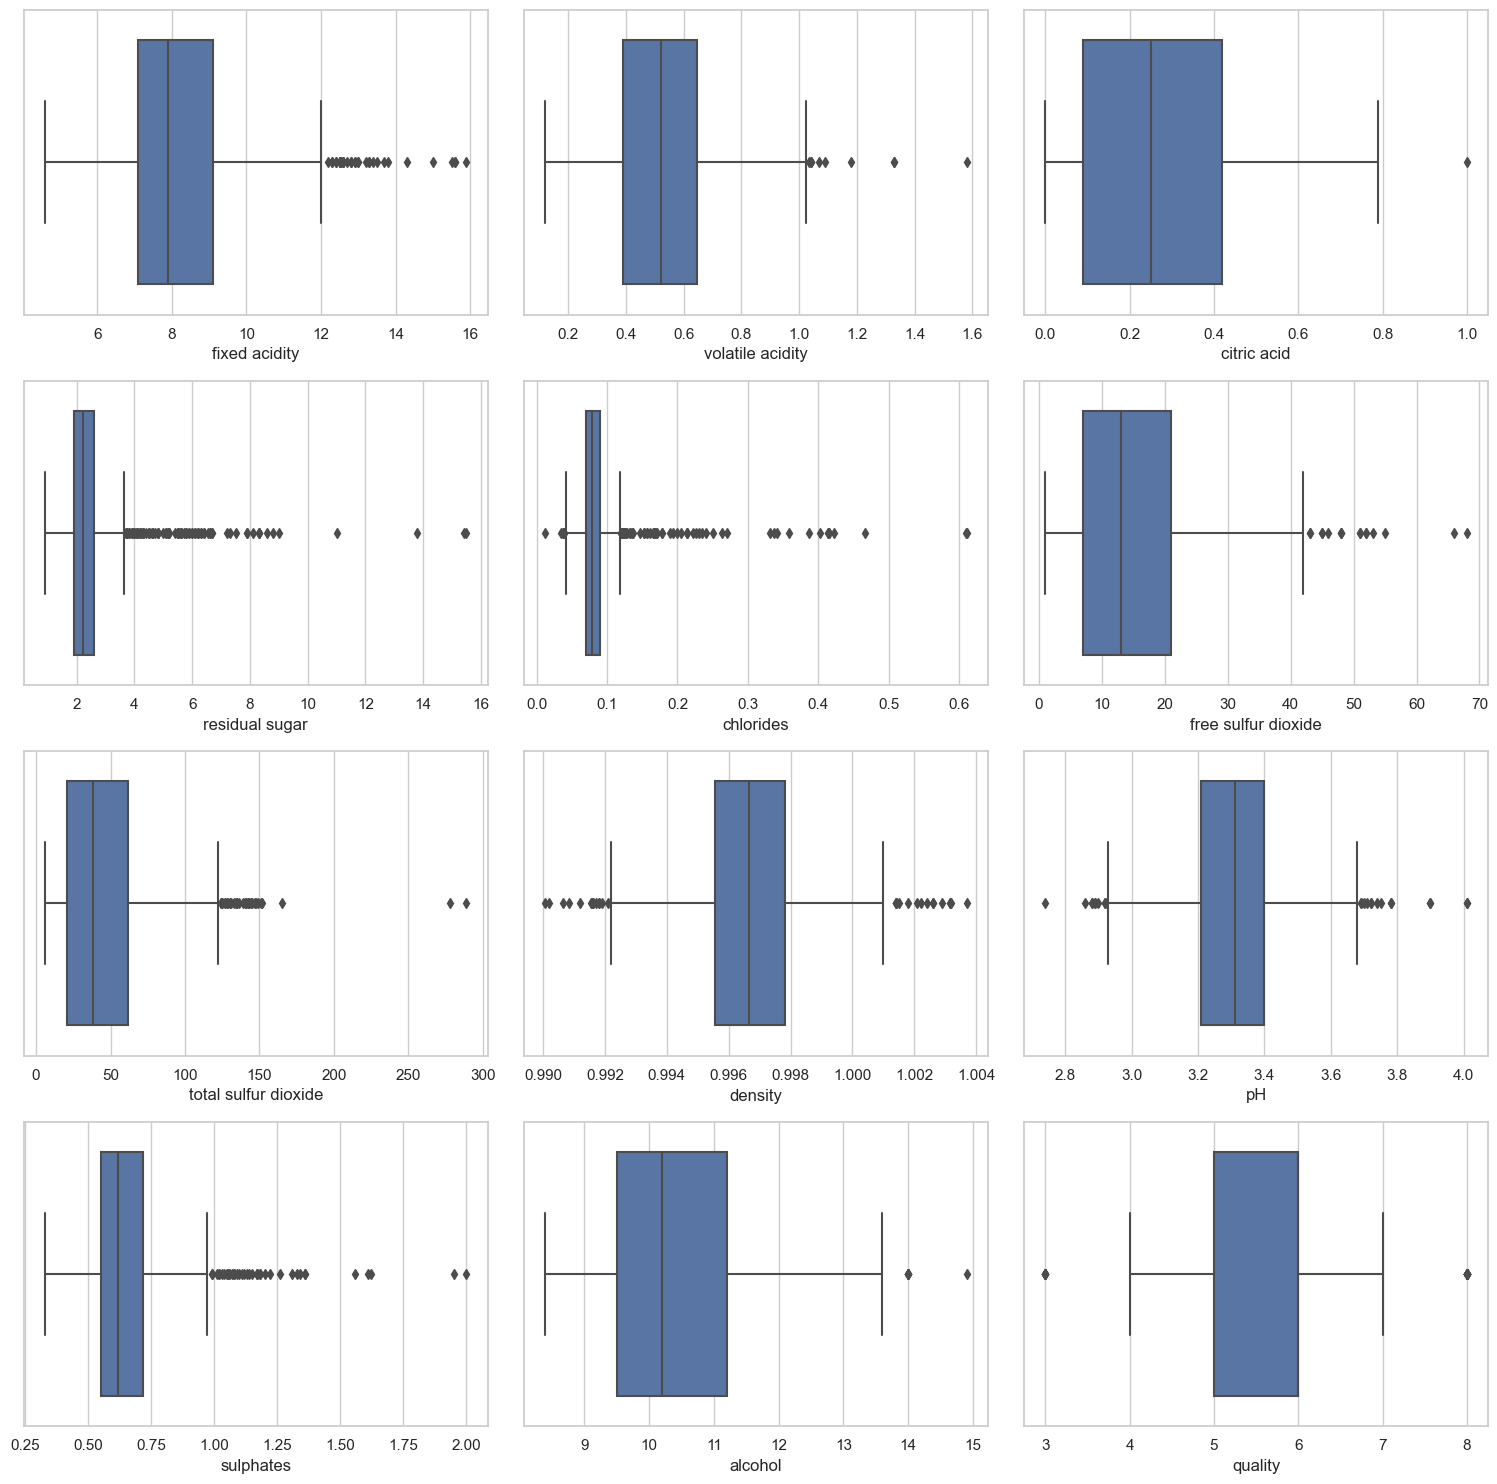

In [8]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for idx, name in enumerate(df.columns):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    sns.boxplot(x=name, data=df, ax=ax)

plt.tight_layout()
plt.show()

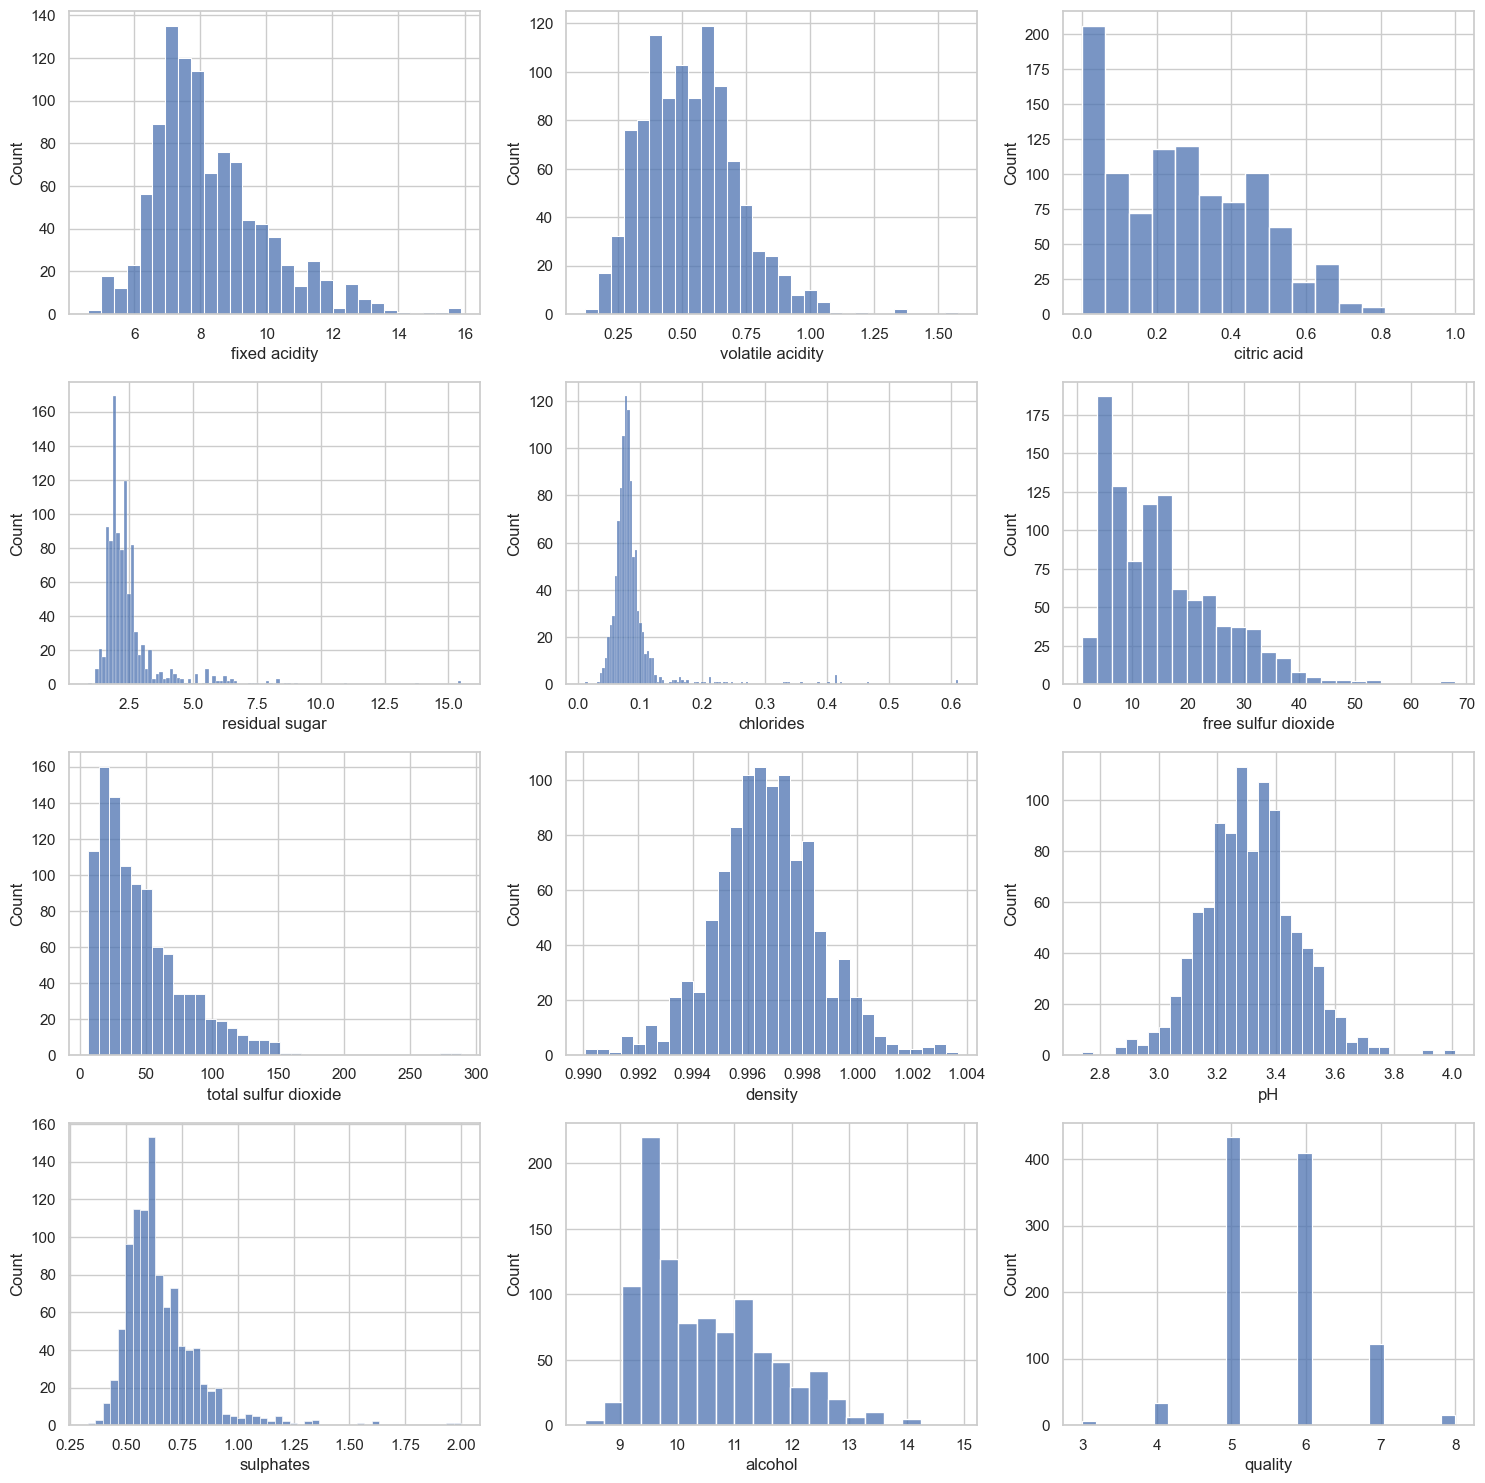

In [9]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for idx, name in enumerate(df.columns):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    sns.histplot(df[name], ax=ax)

plt.tight_layout()
plt.show()

<AxesSubplot: >

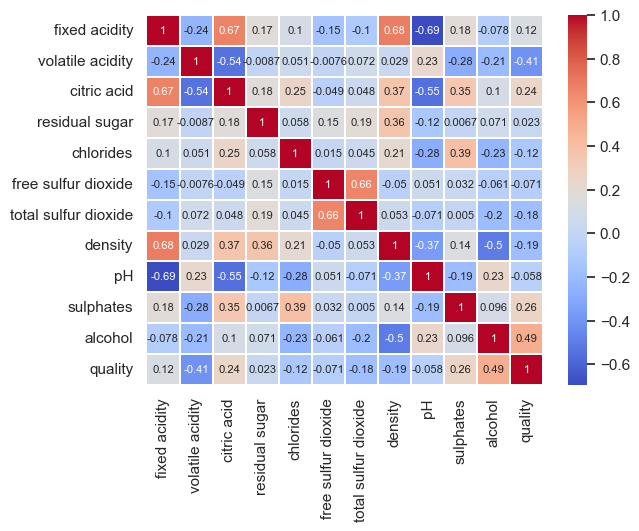

In [10]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.2, annot_kws={'size': 8})

The data seems to be balanced enough. The only column that takes correlation values around (-)0.7 is the fixed acidity, so if the models peforms poorly I'll think about removing it.

The distribution is suspicious in residual sugar and chlorides. Moreover we have some outliers in other columns, will try to get rid of them. 

In [11]:
df = df[df['total sulfur dioxide'] < 200]
df = df[df['sulphates'] < 1.50]
df = df[df['residual sugar'] < 10]
df = df[df['chlorides'] < 0.2]

In [12]:
df.count()

fixed acidity           984
volatile acidity        984
citric acid             984
residual sugar          984
chlorides               984
free sulfur dioxide     984
total sulfur dioxide    984
density                 984
pH                      984
sulphates               984
alcohol                 984
quality                 984
dtype: int64

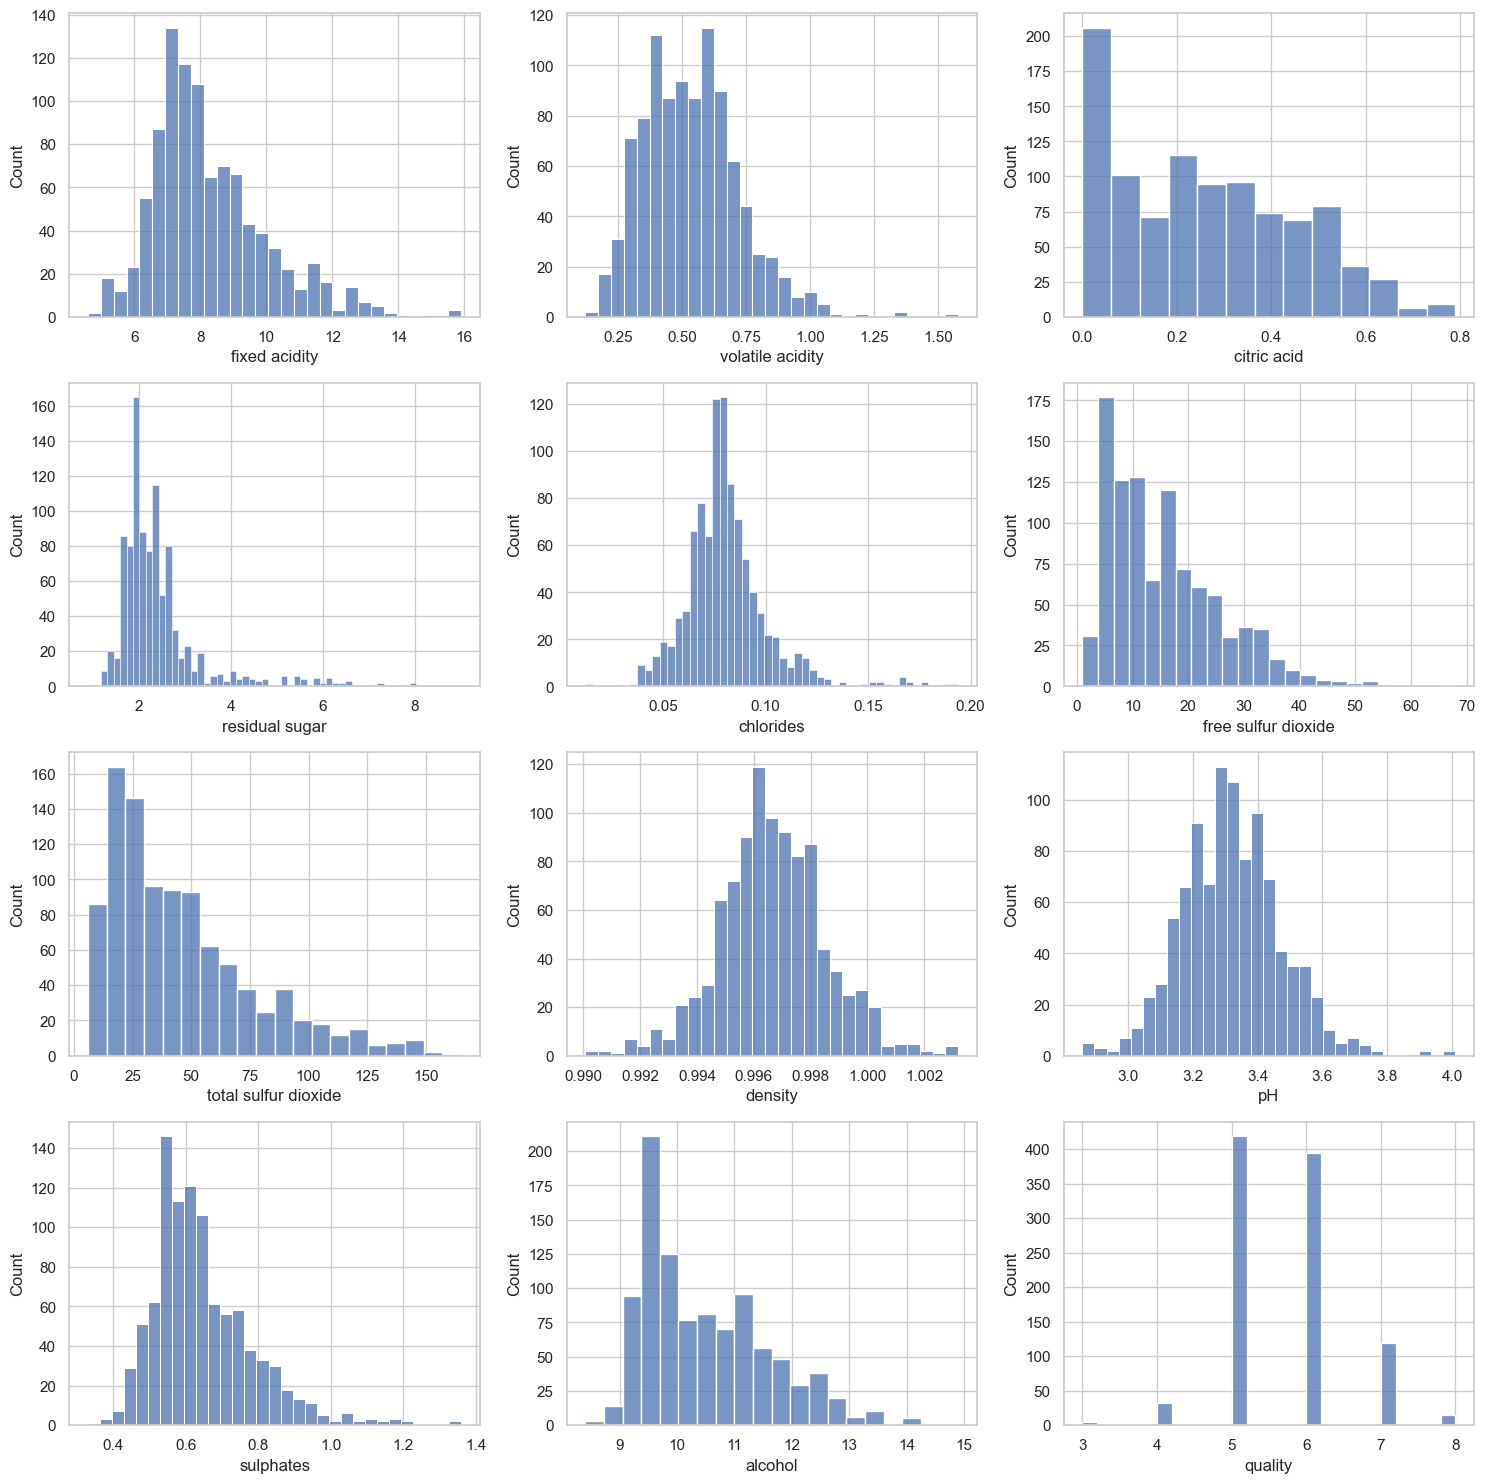

In [13]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))

for idx, name in enumerate(df.columns):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    sns.histplot(df[name], ax=ax)

plt.tight_layout()
plt.show()

SHOULD I DO IT???? - In the task I need to have binary decision, so I cut quality between 5 and 6

In [14]:
df['score'] = df['quality'].apply(lambda x: 'good' if x > 5 else 'bad')
df.drop('quality', axis=1, inplace=True)

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad


# First model - XGBoost

In [53]:
# XGBoost Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

X = df.drop('score', axis=1)
y = df['score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [54]:
features = X.columns
features_map = dict(zip(features, range(len(features))))
features_map

{'fixed acidity': 0,
 'volatile acidity': 1,
 'citric acid': 2,
 'residual sugar': 3,
 'chlorides': 4,
 'free sulfur dioxide': 5,
 'total sulfur dioxide': 6,
 'density': 7,
 'pH': 8,
 'sulphates': 9,
 'alcohol': 10}

In [65]:
reversed_map = {features_map[x]: x for x in features_map.keys()}
reversed_map

{0: 'fixed acidity',
 1: 'volatile acidity',
 2: 'citric acid',
 3: 'residual sugar',
 4: 'chlorides',
 5: 'free sulfur dioxide',
 6: 'total sulfur dioxide',
 7: 'density',
 8: 'pH',
 9: 'sulphates',
 10: 'alcohol'}

In [55]:
params = {
    "max_depth": len(features_map) * 2,
    "eta": 0.1,
    "nthread": 2,
    "seed": 0,
    "eval_metric": "rmse",
    "monotone_constraints": "(" + ",".join(["1"] * len(features_map)) + ")",
    "n_estimators": 1,
}

In [56]:
model = XGBClassifier(**params)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy Score: ', round(accuracy_score(y_test, y_pred), 4))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))



Accuracy Score:  0.7563
Confusion Matrix: 
 [[66 23]
 [25 83]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.73        89
           1       0.78      0.77      0.78       108

    accuracy                           0.76       197
   macro avg       0.75      0.76      0.75       197
weighted avg       0.76      0.76      0.76       197



In [57]:
booster = model.get_booster()

In [58]:
from xgboost import plot_tree

<AxesSubplot: >

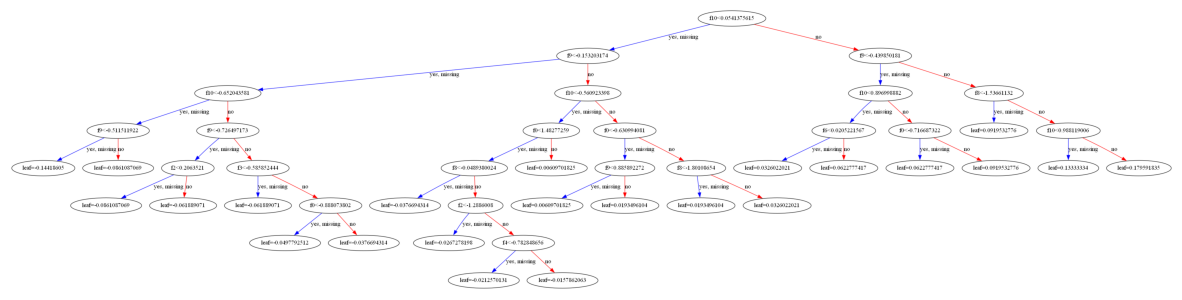

In [59]:
fig, ax = plt.subplots(figsize=(15, 15))
plot_tree(model, ax=ax, num_trees=0)

In [67]:
fscores = booster.get_fscore()
fscores = {reversed_map[int(x[1:])]: fscores[x] for x in fscores.keys()}
fscores

{'fixed acidity': 4.0,
 'citric acid': 2.0,
 'residual sugar': 1.0,
 'chlorides': 1.0,
 'total sulfur dioxide': 1.0,
 'pH': 3.0,
 'sulphates': 5.0,
 'alcohol': 5.0}

In [68]:
score = booster.get_score(importance_type='gain')
score = {reversed_map[int(x[1:])]: score[x] for x in score.keys()}
score

{'fixed acidity': 1.2073458433151245,
 'citric acid': 0.4810616970062256,
 'residual sugar': 0.5878982543945312,
 'chlorides': 0.043964505195617676,
 'total sulfur dioxide': 0.15046262741088867,
 'pH': 1.1551694869995117,
 'sulphates': 14.280545234680176,
 'alcohol': 32.071815490722656}

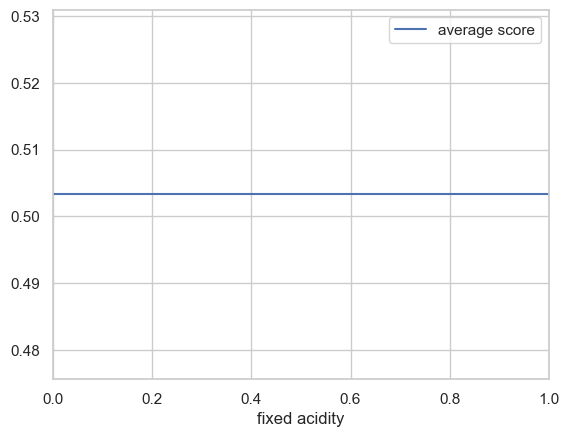

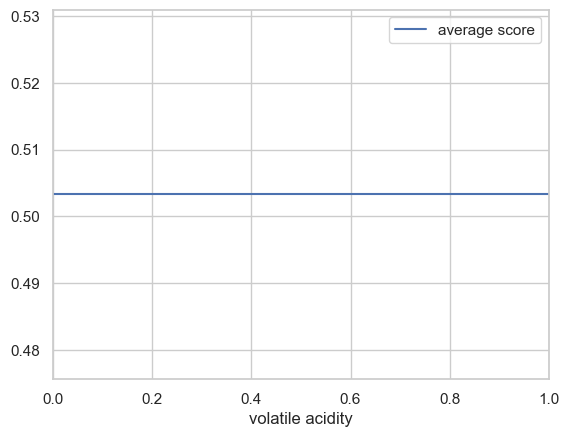

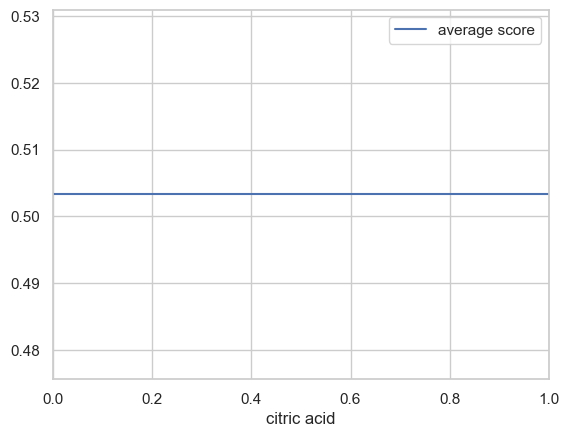

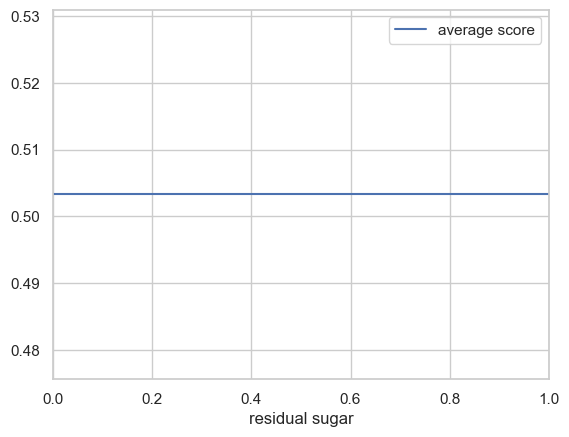

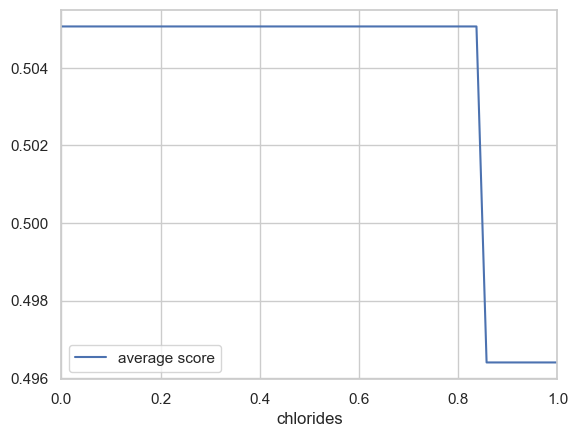

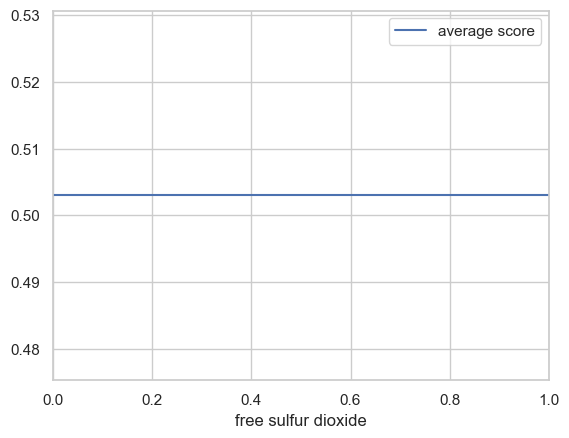

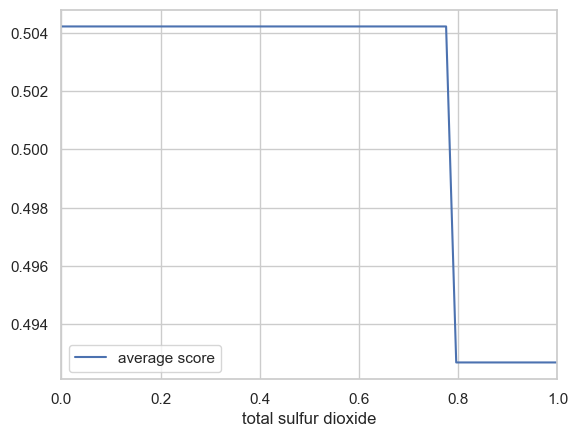

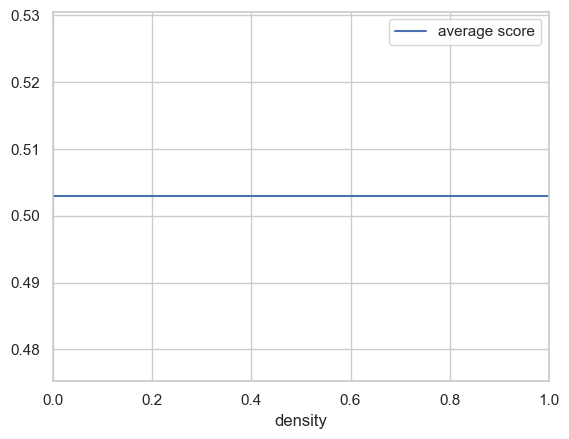

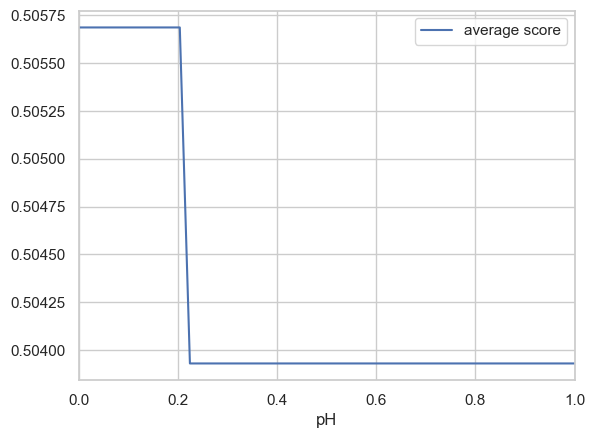

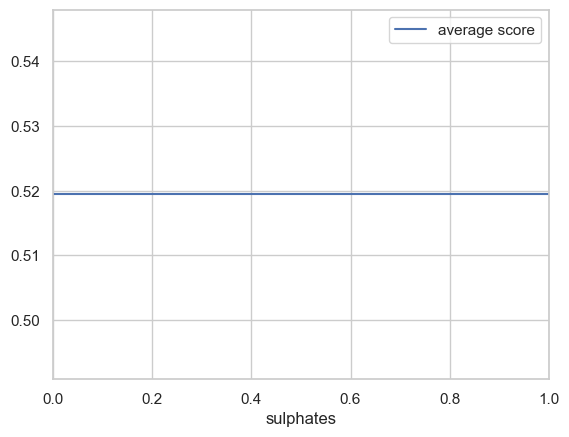

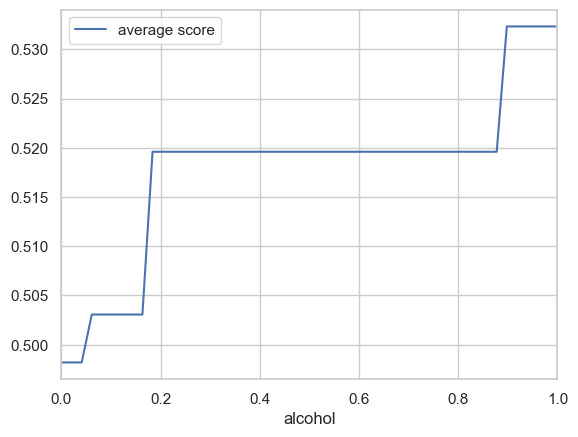

In [51]:
import xgboost as xgb


grid = np.linspace(0,1,50)
for c in features_map:
    y_pred = np.zeros(len(grid))
    for i, val in enumerate(grid):
        X_temp = X_train.copy()
        X_temp[:, features_map[c]] = val
        data = xgb.DMatrix( pd.DataFrame(X_temp) )
        y_pred[i] = np.average(booster.predict(data))
        
    fig, ax = plt.subplots()
    ax.plot(grid, y_pred,  label='average score')
    ax.set_xlim(0, 1)
    ax.set_xlabel(c)
    ax.legend()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


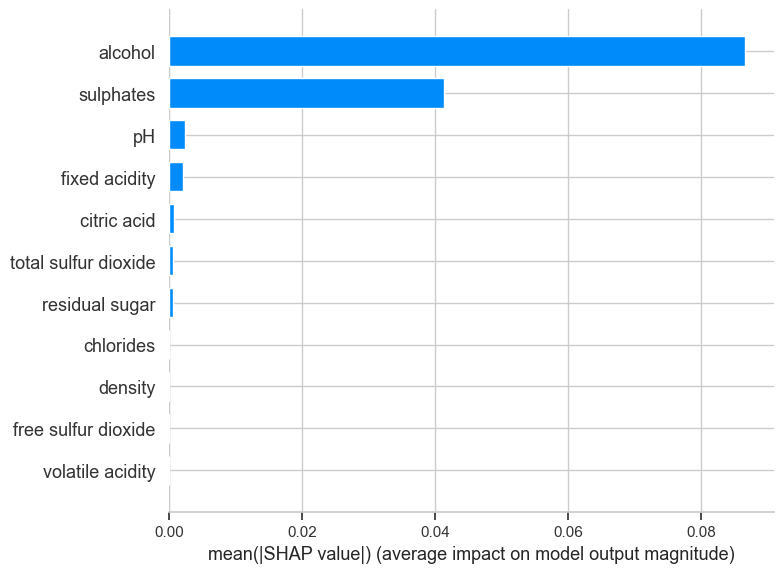

In [69]:
import shap

explainer = shap.TreeExplainer(model)
shape_values = explainer.shap_values(X_test)
shap.summary_plot(shape_values, X_test, plot_type="bar", feature_names=features)

In [82]:
print(features)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


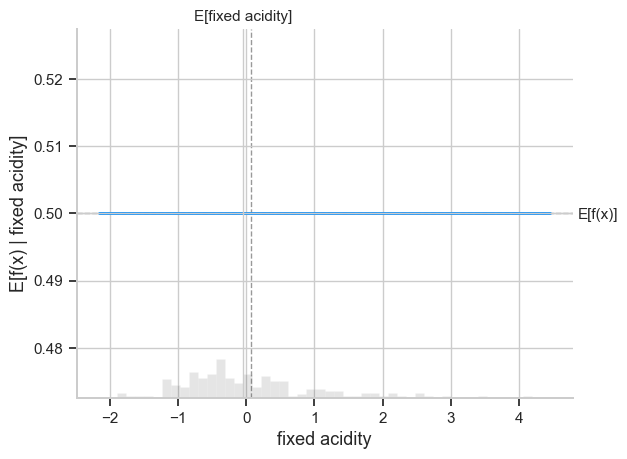

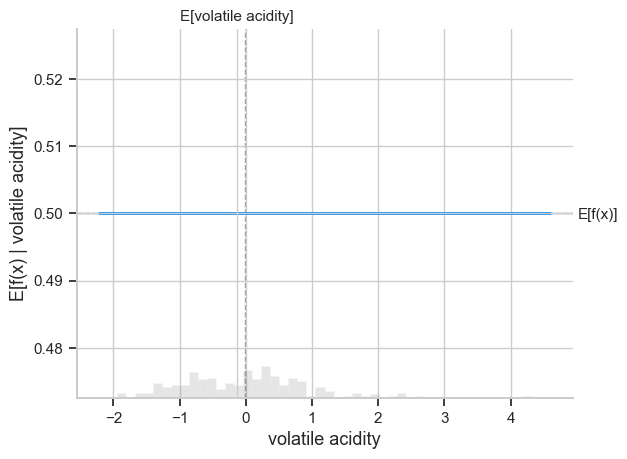

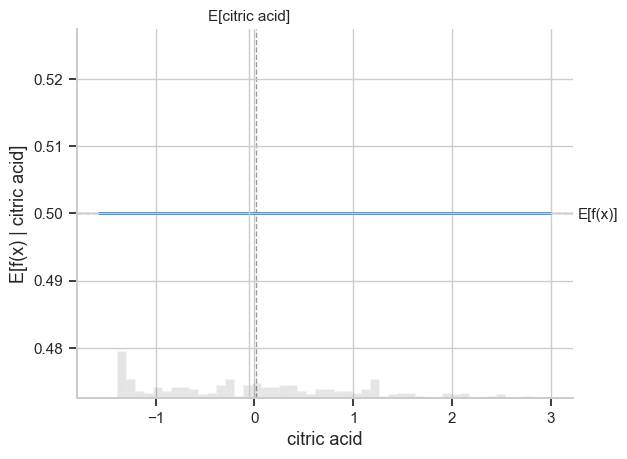

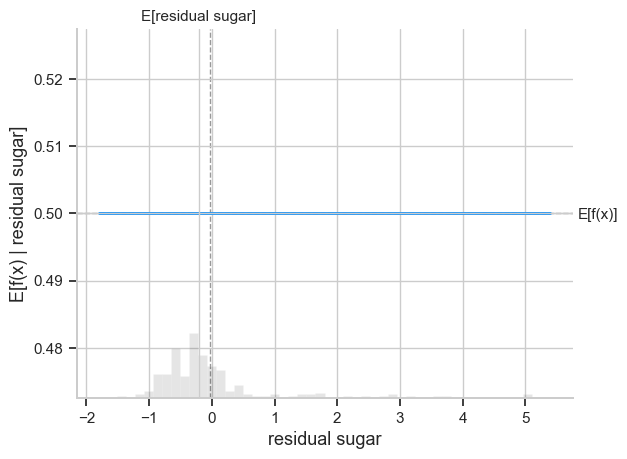

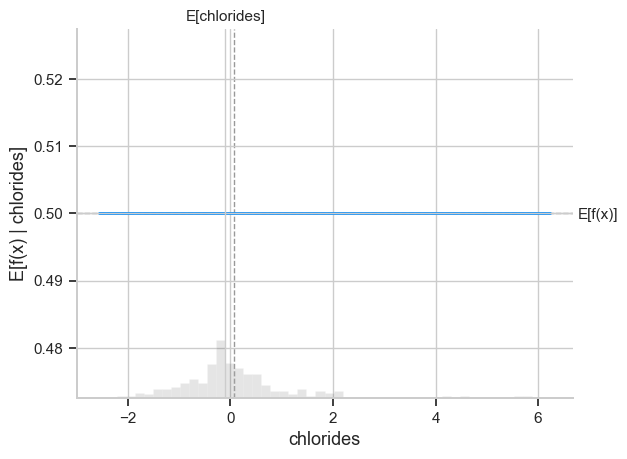

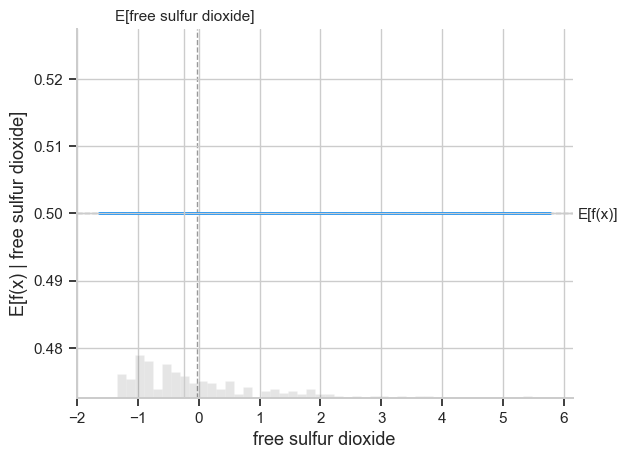

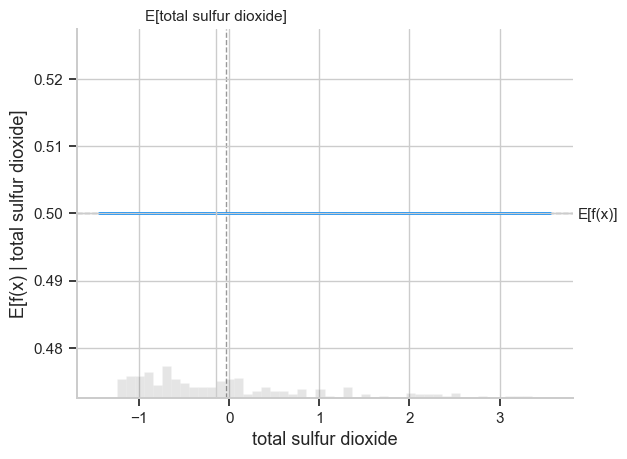

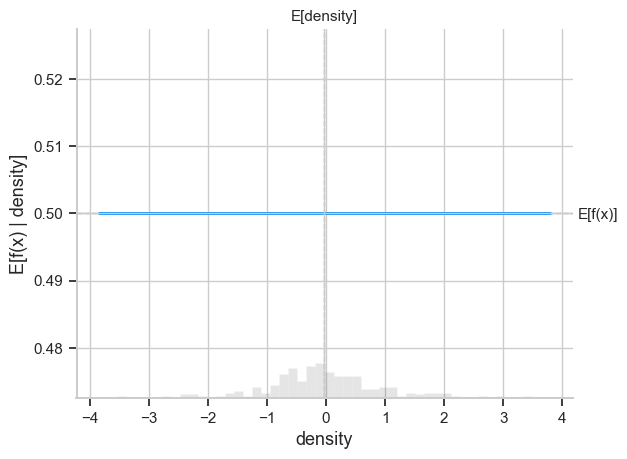

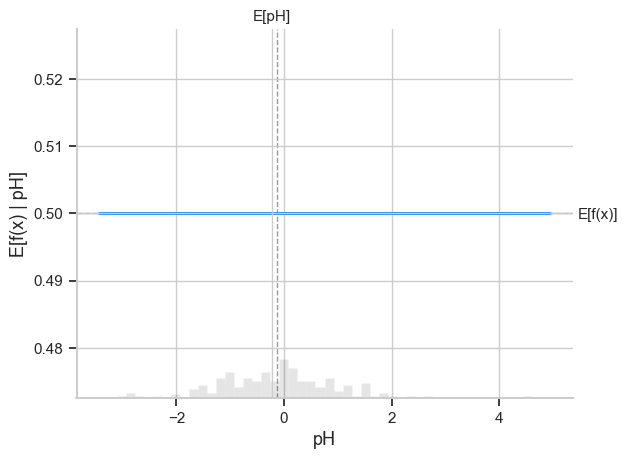

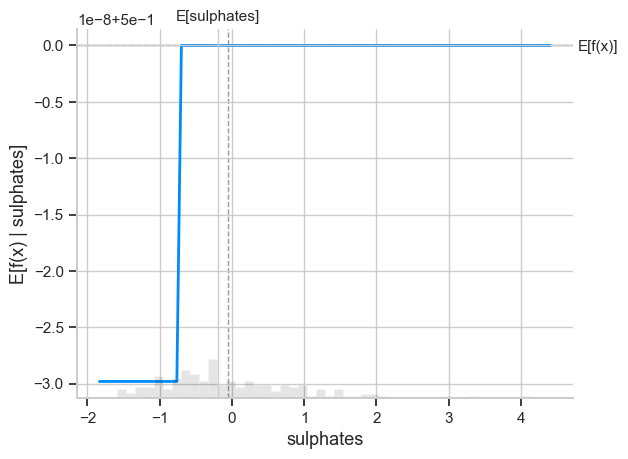

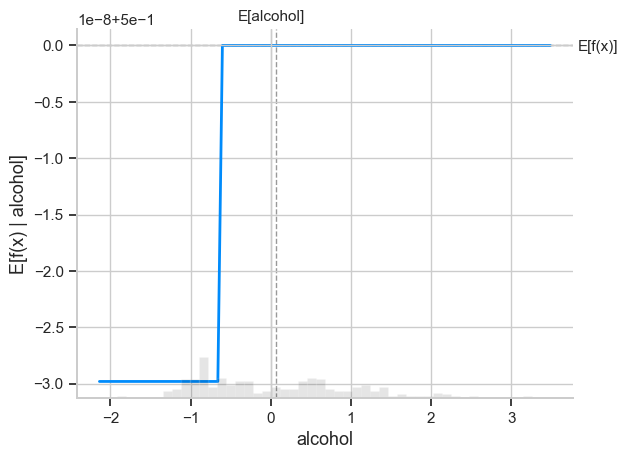

In [85]:
for feature in features:
    shap.partial_dependence_plot(
    feature_idx=feature,
    X=X,
    model_output=shape_values,
    model_output_names="probability",
    ice=False,
    shap_values=shape_values,
    features=X,
    feature_names=list(X.columns),
    show=True
)

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


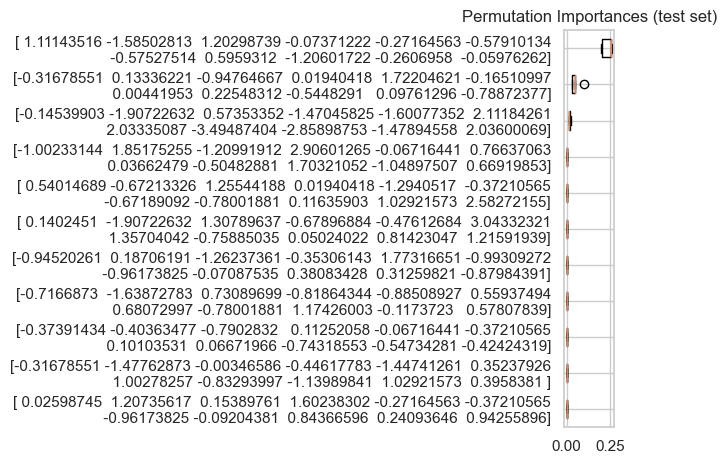

In [87]:
# feature importance

import dalex

